In [1]:
dict = Dict{Char,Array{Int}}()
dict['0']=[0,1,1,1,1,1,1]
dict['1']=[0,1,0,0,0,0,1]
dict['2']=[1,1,1,0,1,1,0]
dict['3']=[1,1,1,0,0,1,1]
dict['4']=[1,1,0,1,0,0,1]
dict['5']=[1,0,1,1,0,1,1]
dict['6']=[1,0,1,1,1,1,1]
dict['7']=[0,1,1,0,0,0,1]
dict['8']=[1,1,1,1,1,1,1]
dict['9']=[1,1,1,1,0,1,1]

const dirseq = ['r','u','l','d','d','r','u'];

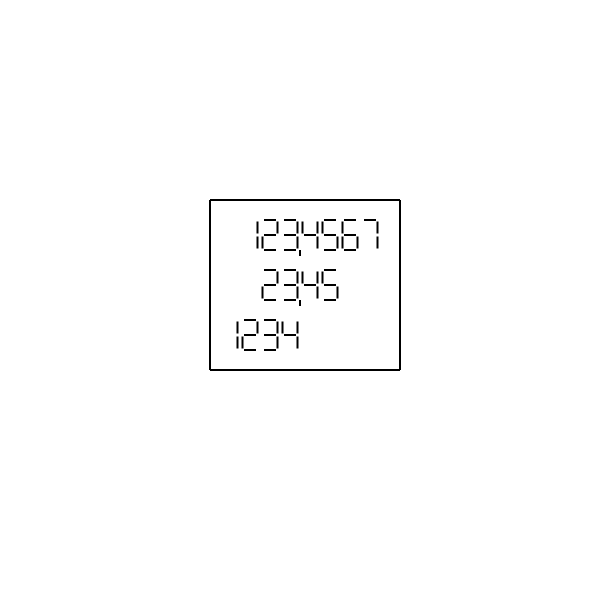

In [2]:
using Luxor

function relativemove(t,x,y)
    Penup(t)
    Turn(t,-90)
    Forward(t,y)
    Turn(t,90)
    Forward(t,x)
end

function segment(t,dir,seglength,trace)
    backdir = 0
    if dir == 'd'
        backdir = -90
        Turn(t,90)
    elseif dir == 'l'
        backdir = 180
        Turn(t,180)
    elseif dir == 'u'
        backdir = 90
        Turn(t,-90)
    end
    Penup(t)
    if trace == 1
        Forward(t,seglength/10)
        Pendown(t)
        Forward(t,8*seglength/10)
        Penup(t)
        Forward(t,seglength/10)
    else
        Forward(t,seglength)
    end
    Turn(t,backdir)
end

function dispchar(t,hexchar,seglen,spacing)
    sequence = dict[hexchar]
    for ii = 1:7
        segment(t,dirseq[ii],seglen,sequence[ii])
    end
    Forward(t,spacing)
end

function drawdot(t,height,spacing)
    relativemove(t,-spacing/2,-height/2)
    Pendown(t)
    Turn(t,90)
    Forward(t,height/5)
    Penup(t)
    Turn(t,180)
    Forward(t,height/5)
    Turn(t,90)
    relativemove(t,spacing/2,height/2)
end
    

function lcd_disp(t::Turtle,num::Number,decimalpt::Point,height::Number)
    seglength = height/2
    spacing = height/6
    charseq = collect(string(num))
    dotpos = max(ceil(log10(num)),1)
    cc = 0
    relativemove(t,decimalpt.x,decimalpt.y)
    relativemove(t,spacing/2-dotpos*(seglength+spacing),seglength)
    for thischar in charseq
        if thischar == '.'
            drawdot(t,height,spacing)
            continue
        end
        dispchar(t,thischar,seglength,spacing)
        cc += 1
    end
    relativemove(t,-decimalpt.x-(cc-dotpos)*(seglength+spacing)-spacing/2,-decimalpt.y-seglength)
end

@svg begin
    t = Turtle()
    lcd_disp(t,123.4567,Point(0,50),30)
    lcd_disp(t,23.45,Point(0,0),30)
    lcd_disp(t,1234,Point(0,-50),30)
    Penup(t)
    Turn(t,-90)
    Forward(t,100)
    Turn(t,90)
    Pendown(t)
    Forward(t,100)
    Turn(t,90)
    Forward(t,170)
    Turn(t,90)
    Forward(t,190)
    Turn(t,90)
    Forward(t,170)
    Turn(t,90)
    Forward(t,90)
    Turn(t,90)
end